In [58]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [8]:
df=pd.read_csv("UltimateClassicRock.csv")


In [16]:
#  Data Understanding
# df.shape
df.head(2)

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Play A Simple Song,38 Special,38 Special,1977,3:13,4,0.521,0.367,0,-13.866,1,0.0278,0.692,0.000003,0.1080,0.789,83.412,16
1,Four Wheels,38 Special,38 Special,1977,4:43,4,0.535,0.710,2,-12.287,1,0.0428,0.010,0.023000,0.0495,0.445,160.361,10


In [18]:
df.columns

Index(['Track', 'Artist', 'Album', 'Year', 'Duration', 'Time_Signature',
       'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Popularity'],
      dtype='object')

In [19]:
df.dtypes

Track                object
Artist               object
Album                object
Year                  int64
Duration             object
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
dtype: object

In [20]:
df.describe()

,Year,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000
mean,1987.634693,3.917811,0.503063,0.656563,5.166597,-9.438675,0.730129,0.051354,0.226924,0.089682,0.210653,0.528818,122.641620,25.394438
std,15.318819,0.356628,0.142619,0.229607,3.503423,4.179623,0.443908,0.046291,0.268857,0.215783,0.180537,0.243557,27.940743,15.090860
min,1962.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,4.000000,0.405000,0.493000,2.000000,-11.914250,0.000000,0.031800,0.013100,0.000013,0.093800,0.338000,102.196500,14.000000
50%,1983.000000,4.000000,0.509000,0.690500,5.000000,-8.810500,1.000000,0.039000,0.104000,0.000737,0.140000,0.529000,121.859000,23.000000
75%,1999.000000,4.000000,0.603000,0.854000,9.000000,-6.341500,1.000000,0.054300,0.370000,0.028375,0.278000,0.724750,139.228000,34.000000
max,2024.000000,5.000000,0.987000,0.998000,11.000000,-0.203000,1.000000,0.952000,0.995000,0.992000,1.000000,0.991000,238.895000,91.000000


In [40]:
# # Data Preparation
# # Remove irrelevant columns
# df.drop([''], axis=1)
# # fix column types
# df.dtypes
# # rename columns
# df = df.rename(columns={'Time_Signature':'TimeSignature'})
# # how many null values for every column
# df.isna().sum()
# # handling duplicates
# df.duplicated()
# df.loc[df.duplicated()]
# df.duplicated(subset=['Album'])
# # to investigate duplicates use query
# df.query('Album == "Dark side of the moon"')
# # to drop rows which are duplicates by a few columns
# df.loc[~df.duplicated(subset=['Album','Artist'])].reset_index(drop=True) 

,Track,Artist,Album,Year,Duration,TimeSignature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity


In [43]:
# Univariate Analysis
# Plot Feature Distributions - Histogram, KDE, Boxplot
df['Year'].value_counts()

Year
1974    494
1976    484
1975    479
1981    462
1983    462
       ... 
2018     58
1998     53
2024     51
1963     13
1962     13
Name: count, Length: 63, dtype: int64

Text(0, 0.5, 'Count')

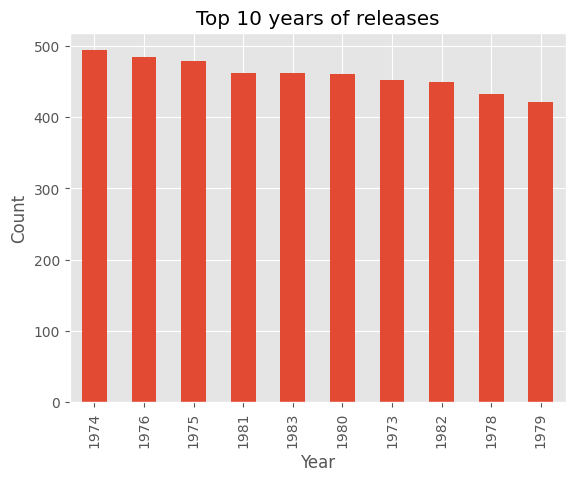

In [50]:
ax = df['Year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 years of releases')
ax.set_xlabel('Year')
ax.set_ylabel('Count')

<Axes: title={'center': 'Acousticness'}, ylabel='Frequency'>

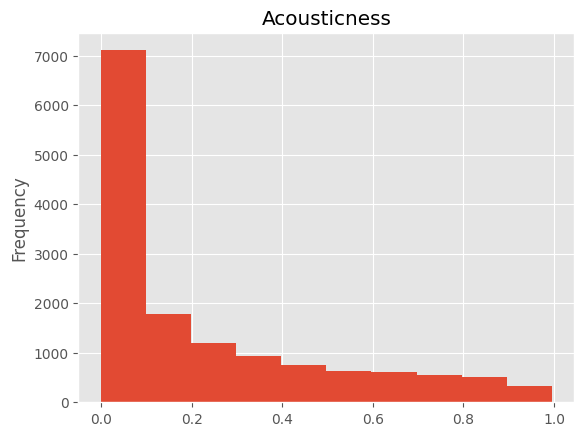

In [56]:
df['Acousticness'].plot(kind='hist', title='Acousticness')

<Axes: title={'center': 'Acousticness'}, ylabel='Density'>

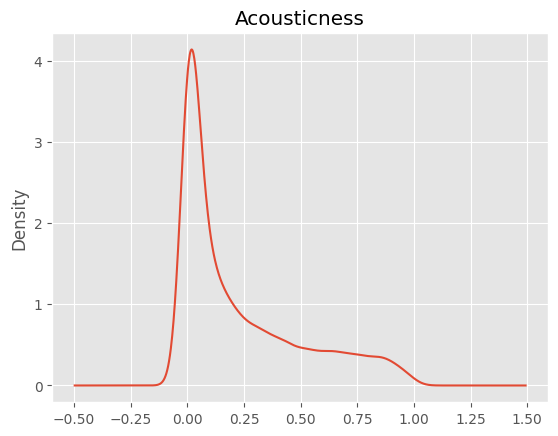

In [60]:
df['Acousticness'].plot(kind='kde', title='Acousticness')

<Axes: xlabel='Acousticness', ylabel='Loudness'>

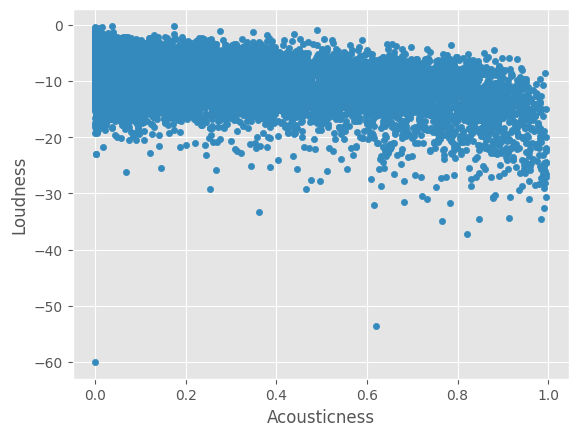

In [61]:
# Comparisons of two features
df.plot(kind = 'scatter', x='Acousticness', y='Loudness')

<Axes: xlabel='Acousticness', ylabel='Loudness'>

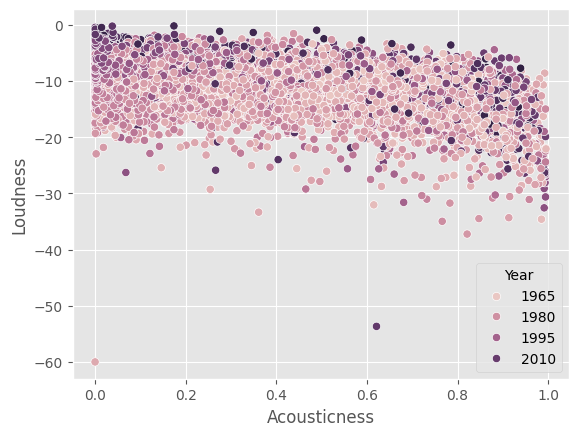

In [63]:
sns.scatterplot(x='Acousticness', y='Loudness', data=df, hue='Year')

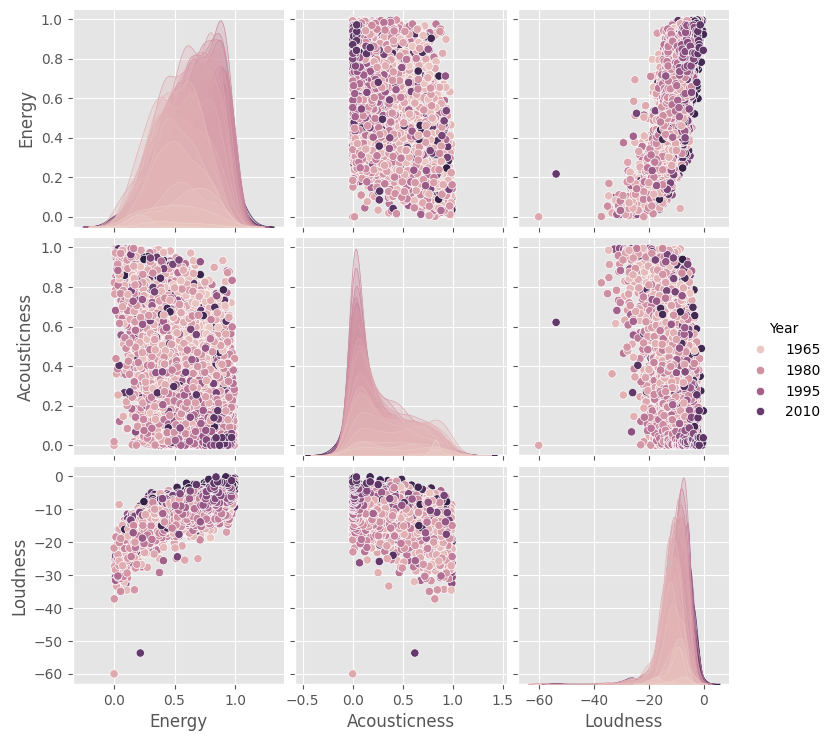

In [65]:
sns.pairplot(data=df, vars=['Energy','Acousticness','Loudness'], hue='Year')

In [66]:
df[['Energy','Acousticness','Loudness']].corr()

,Energy,Acousticness,Loudness
Energy,1.000000,-0.669985,0.761994
Acousticness,-0.669985,1.000000,-0.501768
Loudness,0.761994,-0.501768,1.000000


<Axes: >

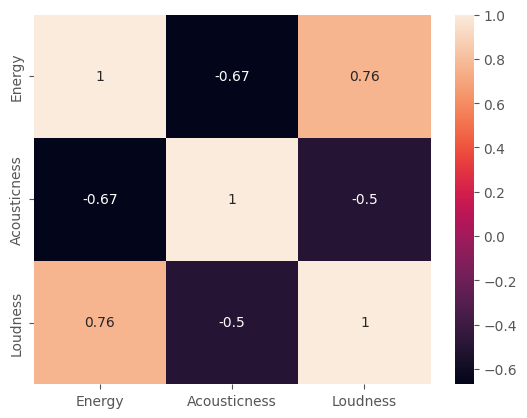

In [68]:
sns.heatmap(df[['Energy','Acousticness','Loudness']].corr(),annot=True)

<Axes: ylabel='Artist'>

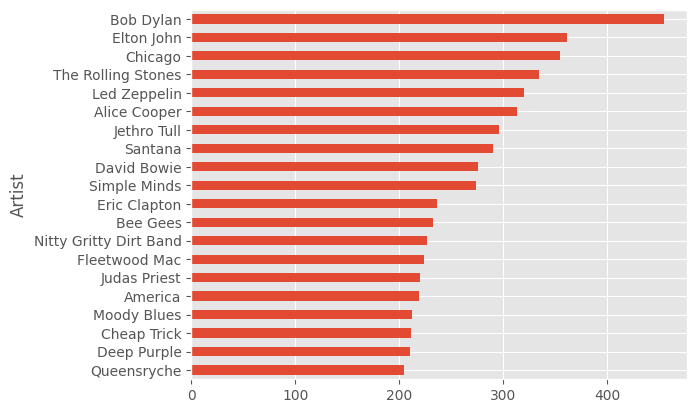

In [84]:
# Start asking questions
# Which Artist has the most Loud, with more than 100 records
df.groupby ('Artist')['Track'].agg(['count']).query('count > 200').sort_values('count')['count'].plot(kind='barh')